[306.889641  30.21417   38.127405  47.47941   58.98957   70.49973
  74.096655  83.44866   84.88743  108.483258 125.748498 259.985739
 272.646915]


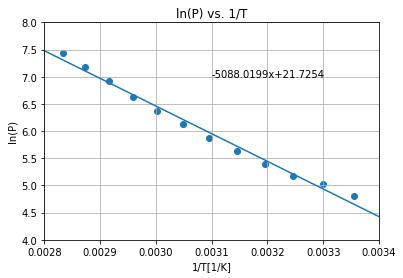

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 22})
data = np.loadtxt('dataa.csv', delimiter=',', unpack=False,skiprows=1)
R = 8.3144621
d = 0.01

theta_rot = 1.43877*0.037315 # [K]
sigma = 2

v = np.array([213.3, 21.0, 26.5, 33.0,41.0,49.0,51.5,58.0,59.0,75.4,87.4,180.7,189.5]) #v[0] er spes, lengdin er 0,1,2...,13
eps = np.array([68.65,68.2,67.7,67.2,66.75,66.3,65.85,65.4,65,64.6,64.2,63.8])
ln_P = np.log(data[:,7]*R*data[:,1]/(eps*d))
theta_j = 1.43877*v
print(theta_j)
#plt.figure(figsize=(20,10))
plt.scatter(data[:,2],ln_P)
a,b = np.polyfit(data[:,2],ln_P,1)
X = np.linspace(0.0025,0.0035,100)
plt.plot(X,a*X+b)
plt.title('ln(P) vs. 1/T')
plt.xlabel('1/T[1/K]')
plt.ylabel('ln(P)')
plt.grid()
plt.xlim(0.0028,0.0034)
plt.ylim(4,8)
plt.text(x=0.0031,y=7,s=str(round(a,4))+'x+'+str(round(b,4)))
plt.savefig('mynd1.pdf')

In [8]:
def margfeldni(theta_j,T):
    margfeldi = np.ones(len(T))*(1-np.exp(-theta_j[1]/T))**0.5#EF eitthvað er skŕitið þá er það þetta
    for i in range(len(T)):
        for j in range(2,13):
            margfeldi[i] = margfeldi[i]*(1-np.exp(-theta_j[j]/T[i]))**0.5
    return margfeldi

def equilibrium(ln_P,T,theta_rot,theta_j,sigma,R):
    margfeldi = margfeldni(theta_j,T)
    theta_vib = theta_j[0]
    h = 6.626*10**(-34) #Js
    m = 253.8089*10**(-3) #kg/mol
    k = 1.38064852*10**(-23)
    A = np.log(T**(7/2)*margfeldi/(1-np.exp(-theta_vib/T)))
    B = np.log((2*np.pi*m*k/h**2)**(3/2)*k/(sigma*theta_rot))
    E = (-ln_P+A+B)*R*T
    return E

E= equilibrium(ln_P,data[:,1],theta_rot,theta_j,2,R)

[306.889641  30.21417   38.127405  47.47941   58.98957   70.49973
  74.096655  83.44866   84.88743  108.483258 125.748498 259.985739
 272.646915]


In [3]:
#def solidentropy(R,theta_j,T):
#    A = theta_j[0]/T
#    B = np.exp(theta_j[0]/T)-1
#    C = np.log(1-np.exp(-theta_j[0]/T))
#    margfeldi = np.ones(len(T))*(A/B-C)
#    for i in range(len(T)):
#        for j in range(1,12):
#            A = theta_j[j]/T[i]
#            B = np.exp(theta_j[j]/T[i])-1
#            C = np.log(1-np.exp(-theta_j[j]/T[i]))
#            margfeldi[i] = margfeldi[i]*(A/B-C)
#    S_s = R*0.5*margfeldi
#    return S_s

def solidentropy(R,theta_j,T):#Kv Emil/Garðar
    S_s = np.zeros(12)
    for i in range(len(T)):
        for j in range(1,13):
            S_s[i] = (theta_j[j]/T[i])/(np.exp(theta_j[j]/T[i])-1) - np.log(1-np.exp(-theta_j[j]/T[i]))
    S_s = R/2 * S_s
    
    return S_s

# print('S_s: ', solidentropy(R,theta_j,data[:,1]))



In [4]:
theta_vib = theta_j[0]
#E = equilibrium(ln_P,data[:,1],theta_rot,theta_j,2,R)


def mugison(E_0,R,T,p,sigma,theta_rot,theta_vib):
    theta_vib = theta_j[0]
    h = 6.626*10**(-34) #Js
    m = 253.8089*10**(-3) #kg/mol
    k = 1.38064852*10**(-23)
    A = (2*np.pi*m*k*T/h**2)**(3/2)*(k*T/p)*(T/(sigma*theta_rot))*(1-np.exp(-theta_vib/T))**(-1)
    mu_g = R*T*np.log(A)
    return mu_g
mu_g = mugison(E,R,data[:,1],data[:,7],2,theta_rot,theta_vib)
print('mu_g: ', mu_g)

def gasentropy(E_0,R,mu_g,T,theta_vib):
    S_g = (mu_g)/T+(7/2)*R+R*(theta_vib/T)/(np.exp(theta_vib/T)-1)
    return S_g

print('S_g: ',gasentropy(E,R,mu_g,data[:,1],theta_vib))



mu_g:  [307961.55737308 312827.87081436 317811.32148457 322639.81069478
 327422.04224262 332127.24940547 336831.81865104 341490.60168299
 346127.02914894 350644.11131717 355240.16604644 359824.16762485]
S_g:  [1067.28403625 1066.33861083 1065.80454082 1064.79277263 1063.66766098
 1062.33920339 1061.04957267 1059.66142809 1058.24845249 1056.52895308
 1055.08601185 1053.6500053 ]


[4.66890413 4.73352088 4.79721989 4.86002446 4.92195715 4.98303979
 5.0432935  5.10273875 5.1613953  5.21928232 5.27641834 5.3328213 ]
[1067.28403625 1066.33861083 1065.80454082 1064.79277263 1063.66766098
 1062.33920339 1061.04957267 1059.66142809 1058.24845249 1056.52895308
 1055.08601185 1053.6500053 ]
27777.470116439403 970.6168682826554


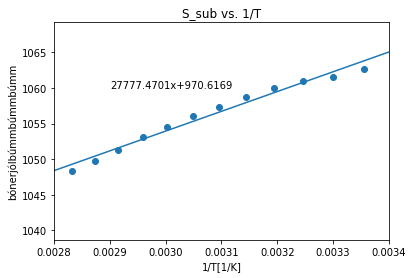

In [5]:
S_s = solidentropy(R,theta_j,data[:,1])
S_g = gasentropy(E,R,mu_g,data[:,1],theta_j[0])
print(S_s)
print(S_g)
S_sub = S_g-S_s


plt.scatter(data[:,2],S_sub)
a,b = np.polyfit(data[:,2],S_sub,1)
#X = np.linspace(0.0025,0.0035,100)
plt.plot(X,a*X+b)
plt.title('S_sub vs. 1/T')
plt.xlabel('1/T[1/K]')
plt.ylabel('bónerjólbúmmbúmmbúmm')
plt.xlim(0.0028,0.0034)
plt.text(x=0.0029,y=1060,s=str(round(a,4))+'x+'+str(round(b,4)))
print(a,b)